In [10]:
import numpy as np 
import pylab as pl 
import networkx as nx 

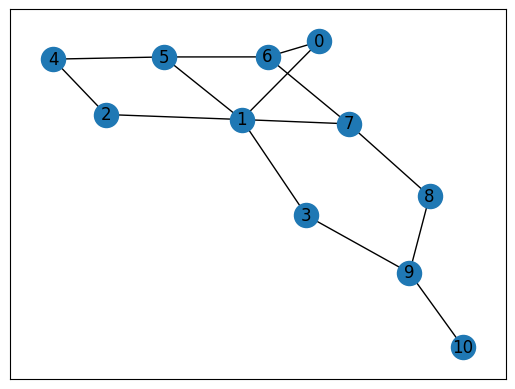

<Figure size 640x480 with 0 Axes>

In [11]:
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),  
         (1, 3), (9, 10), (2, 4), (0, 6), (6, 7), 
         (8, 9), (7, 8), (1, 7), (3, 9)] 
  
goal = 10
G = nx.Graph() 
G.add_edges_from(edges) 
pos = nx.spring_layout(G) 
nx.draw_networkx_nodes(G, pos) 
nx.draw_networkx_edges(G, pos) 
nx.draw_networkx_labels(G, pos) 
pl.show() 
pl.savefig('graph.png')

In [12]:
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape =(MATRIX_SIZE, MATRIX_SIZE))) 
M *= -1
  
for point in edges: 
    print(point) 
    if point[1] == goal: 
        M[point] = 100
    else: 
        M[point] = 0
  
    if point[0] == goal: 
        M[point[::-1]] = 100
    else: 
        M[point[::-1]]= 0
        # reverse of point 
  
M[goal, goal]= 100
print(M) 
# add goal point round trip 

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


In [14]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE])) 

gamma = 0.75
# learning parameter 
initial_state = 1

# Determines the available actions for a given state 
def available_actions(state): 
	current_state_row = M[state, ] 
	available_action = np.where(current_state_row >= 0)[1] 
	return available_action 

available_action = available_actions(initial_state) 

# Chooses one of the available actions at random 
def sample_next_action(available_actions_range): 
	next_action = int(np.random.choice(available_action, 1)) 
	return next_action 


action = sample_next_action(available_action) 

def update(current_state, action, gamma): 
    
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1] 
    if max_index.shape[0] > 1: 
        max_index = int(np.random.choice(max_index, size = 1)) 
    else: 
        max_index = int(max_index) 
    max_value = Q[action, max_index] 
    Q[current_state, action] = M[current_state, action] + gamma * max_value 
    if (np.max(Q) > 0): 
    	return(np.sum(Q / np.max(Q)*100)) 
    else: 
    	return (0) 
# Updates the Q-Matrix according to the path chosen 

update(initial_state, action, gamma) 

C:\Users\loopy\AppData\Local\Temp\ipykernel_15936\1610481340.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_action, 1))
C:\Users\loopy\AppData\Local\Temp\ipykernel_15936\1610481340.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))


0

C:\Users\loopy\AppData\Local\Temp\ipykernel_15936\1610481340.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_action, 1))
C:\Users\loopy\AppData\Local\Temp\ipykernel_15936\1610481340.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))
C:\Users\loopy\AppData\Local\Temp\ipykernel_15936\1610481340.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int

Most efficient path:
[0, 1, 3, 9, 10]


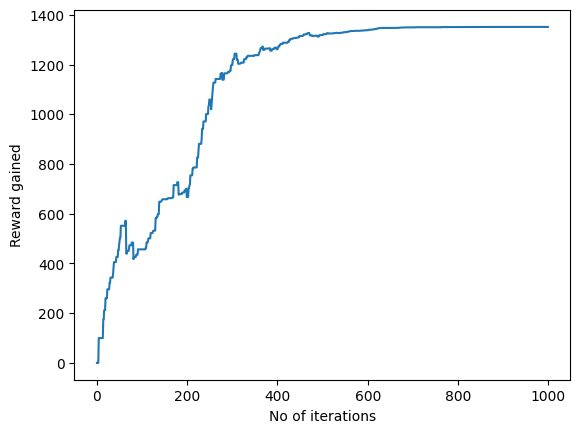

<Figure size 640x480 with 0 Axes>

In [15]:
scores = [] 
for i in range(1000): 
    current_state = np.random.randint(0, int(Q.shape[0])) 
    available_action = available_actions(current_state) 
    action = sample_next_action(available_action) 
    score = update(current_state, action, gamma) 
    scores.append(score) 
  
# print("Trained Q matrix:") 
# print(Q / np.max(Q)*100) 
# You can uncomment the above two lines to view the trained Q matrix 
  
# Testing 
current_state = 0
steps = [current_state] 
  
while current_state != 10: 
  
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1] 
    if next_step_index.shape[0] > 1: 
        next_step_index = int(np.random.choice(next_step_index, size = 1)) 
    else: 
        next_step_index = int(next_step_index) 
    steps.append(next_step_index) 
    current_state = next_step_index 
  
print("Most efficient path:") 
print(steps) 
  
pl.plot(scores) 
pl.xlabel('No of iterations') 
pl.ylabel('Reward gained') 
pl.show()
pl.savefig("bestpath.png")